# Recurrent Neural Network

##Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('BTC.csv')
#training_set = dataset_train.iloc[:3000, 1:2].values

In [ ]:
training_set = dataset_train.iloc[:3000, 2:3].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 90 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(90, 3000):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(2910, 90, 1)

##Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:

my_rnn_model = Sequential()
my_rnn_model.add(SimpleRNN(32, return_sequences=True))
#my_rnn_model.add(SimpleRNN(32, return_sequences=True))
#my_rnn_model.add(SimpleRNN(32, return_sequences=True))
my_rnn_model.add(SimpleRNN(32))
my_rnn_model.add(Dense(1)) # The time step of the output

my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

##Making the predictions and visualising the results

### Price Prediction


In [ ]:
#real_stock_price = dataset_train.iloc[3001:, 1:2].values

In [ ]:
real_stock_price = dataset_train.iloc[3001:, 2:3].values

### Getting the predicted price

In [ ]:
#dataset_total = dataset_train['Open']
dataset_total = dataset_train['Close']
inputs = dataset_total[len(dataset_total) - len(real_stock_price) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, len(inputs)):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = my_rnn_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 0s 10ms/step


### Visualising the results

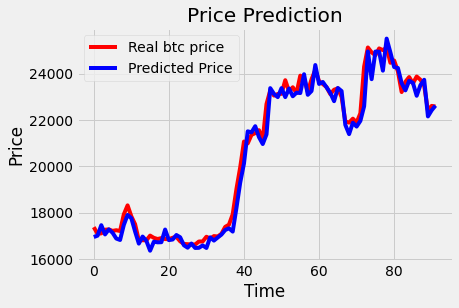

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(real_stock_price, color = 'red', label = 'Real btc price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(real_stock_price,predicted_stock_price)

0.98182586609998

In [ ]:
mse = my_rnn_model.evaluate(X_test, sc.transform(real_stock_price))
print('Mean Squared Error:', mse)

3/3 [==============================] - 0s 10ms/step - loss: 3.7948e-05
Mean Squared Error: 3.794804433709942e-05


### Trying for a generalised value

In [ ]:
#date='2014-12-24'
date='2023-03-05'
locate=int(np.where(dataset_train["Date"]==date)[0])
print(locate)

3091


In [ ]:
#l=dataset_train.iloc[locate-90:locate,1:2].values
l=dataset_train.iloc[locate-90:locate, 2:3].values
l=sc.transform(l)
print(l)

[[0.25032004]
 [0.24614539]
 [0.24640077]
 [0.24871258]
 [0.24889676]
 [0.24796759]
 [0.24838768]
 [0.24790545]
 [0.25836832]
 [0.26403261]
 [0.25715303]
 [0.25217739]
 [0.24189805]
 [0.24211382]
 [0.24199921]
 [0.24499518]
 [0.24359263]
 [0.24286168]
 [0.24342374]
 [0.24283295]
 [0.24277246]
 [0.24364108]
 [0.24422031]
 [0.2414253 ]
 [0.23972776]
 [0.23960632]
 [0.23939573]
 [0.23941692]
 [0.2412966 ]
 [0.24131269]
 [0.24428943]
 [0.24311465]
 [0.2446891 ]
 [0.24444155]
 [0.24613491]
 [0.25049218]
 [0.25187402]
 [0.25843846]
 [0.2744085 ]
 [0.28803146]
 [0.3042294 ]
 [0.30304251]
 [0.30839594]
 [0.3095302 ]
 [0.31136522]
 [0.3055107 ]
 [0.32781156]
 [0.33641477]
 [0.33312483]
 [0.33414201]
 [0.33425174]
 [0.34282722]
 [0.33575465]
 [0.33838878]
 [0.33471669]
 [0.3457114 ]
 [0.34380783]
 [0.33557885]
 [0.34344607]
 [0.34931781]
 [0.34218567]
 [0.340419  ]
 [0.33847211]
 [0.33403692]
 [0.33683221]
 [0.33766315]
 [0.33224564]
 [0.316858  ]
 [0.31613218]
 [0.31860505]
 [0.31623431]
 [0.32

In [ ]:
l=l.flatten()

In [ ]:
l=l.reshape((1,90,1))

In [ ]:
predict=my_rnn_model.predict(l)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(sc.inverse_transform(predict))

[[22426.566]]


In [ ]:
#dataset_train.loc[locate+1]['Open']

dataset_train.loc[locate+1]['Close']

22429.757813